In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [386]:
def read_data(dataset_name):
    data = pd.read_csv('data/' + dataset_name + '.csv')
    data['class'] = data['class'].map({'P': 1, 'N': -1})
    X = data.values[:, :-1]
    Y = data.values[:, -1]
    return X, Y

In [336]:
class AdaBoost:
    def __init__(self, n_estimators=10, learning_rate=0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
    
    def fit(self, X, Y):
        self.alphas = []
        self.classifiers = []
        self.X = X
        self.Y = Y
        N = len(X)
        weights = np.ones(N) / N
        for i in range(self.n_estimators):
            indices = np.random.choice(N, N, p=weights)
            X = self.X[indices]
            Y = self.Y[indices]
            base_estimator = DecisionTreeClassifier(max_depth=2)
            classifier = base_estimator.fit(X, Y)
            Y_pred = classifier.predict(self.X)
            
            estimator_error = np.sum((self.Y != Y_pred) * weights)
            estimator_error = estimator_error / np.sum(weights)
            estimator_weight = self.learning_rate * np.log((1 - estimator_error) / estimator_error)
            self.alphas.append(estimator_weight)
            self.classifiers.append(classifier)
            
            weights = weights * np.exp(-estimator_weight * self.Y * Y_pred)
            weights = weights / np.sum(weights)

    def predict(self, X, isCumSum = False):
        predictions = []
        for alpha, classifier in zip(self.alphas, self.classifiers):
            prediction = alpha * classifier.predict(X)
            predictions.append(prediction)
        if (isCumSum):
            return np.sign(np.cumsum(np.array(predictions), axis=0))
        else:
            return np.sign(np.sum(np.array(predictions), axis=0))

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return sum(Y_pred == Y) / len(Y_pred)

In [387]:
def draw(clf, X, Y):
    x_min, y_min = np.amin(X, axis = 0)
    x_max, y_max = np.amax(X, axis = 0)
    x, y = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
    points = np.column_stack([x.reshape((-1)), y.reshape((-1))])
    results = clf.predict(points, False)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    neg_x, neg_y = X[Y == -1].T
    pos_x, pos_y = X[Y == 1].T
    
    pos_back_x = [points[i][0] for i in range(len(points)) if results[i] == 1]
    pos_back_y = [points[i][1] for i in range(len(points)) if results[i] == 1]
    neg_back_x = [points[i][0] for i in range(len(points)) if results[i] == -1]
    neg_back_y = [points[i][1] for i in range(len(points)) if results[i] == -1]
                  
    plt.scatter(neg_back_x, neg_back_y, marker='.', color='#FFAAAA', s=50)
    plt.scatter(pos_back_x, pos_back_y, marker='.', color='#AAAAFF', s=50)
    plt.scatter(neg_x, neg_y, marker='_', color='red', s=50)
    plt.scatter(pos_x, pos_y, marker='+', color='blue', s=50)
    plt.show()

In [388]:
def classify_space(X, Y, clf, needDraw):
    clf.fit(X, Y)
    score = clf.score(X, Y)
    if (needDraw):
        print(score)
        draw(clf, X, Y)
    return score

In [389]:
def do_boost(dataset_name, estim_num = 50):
    X, Y = read_data(dataset_name)
    clf = AdaBoost(n_estimators=estim_num, learning_rate=0.5)
    classify_space(X, Y, clf, True)

In [340]:
def draw_estim_number_score_dependency(X_cur, Y_cur, name):
    xx = []
    yy = []
    for i in range(1, 200):
        xx.append(i)
        clf = AdaBoost(n_estimators=i, learning_rate=0.5)
        yy.append(classify_space(X_cur, Y_cur, clf, False))
    f, ax = plt.subplots(1, 1, sharey=True)
    ax.plot(xx, yy)
    ax.set_xlabel('estimators number')
    ax.set_ylabel('accuracy score')
    ax.set_title(name)
    plt.show()

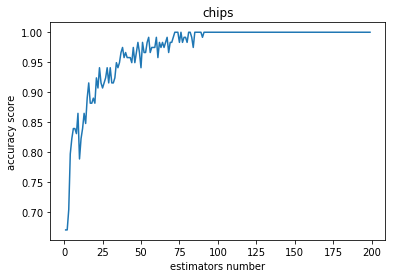

In [392]:
X, Y = read_data('chips')
draw_estim_number_score_dependency(X, Y, 'chips')

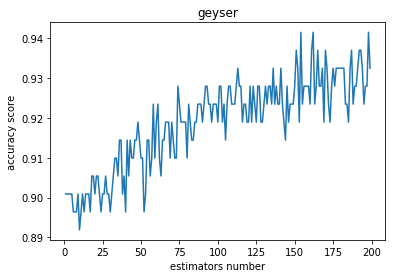

In [393]:
X, Y = read_data('geyser')
draw_estim_number_score_dependency(X, Y, 'geyser')

0.9661016949152542


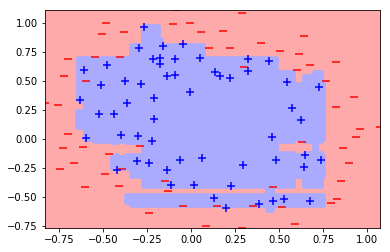

In [394]:
do_boost('chips')

0.918918918918919


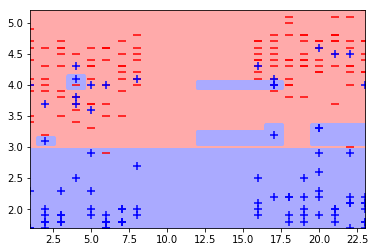

In [395]:
do_boost('geyser')